#### ML_Playground 5

In [2]:
## General Import
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import sys



In [3]:
### Local Import
package_path = '/home/Lakehouse/DreamBrookPy'
if package_path not in sys.path:
    sys.path.append(package_path)
import DreamBrookPy.MachineLearning as ML
import DreamBrookPy.DataChef as DC

2024-02-19 13:37:13.771308: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [4]:
## Development Code

def savedict(file_path, dict_name):
    """Save dictionary dict_name to file_path"""
    with open(file_path, 'wb') as file:
        pickle.dump(dict_name, file)
        print(f"The data dictionary has been saved to {file_path}.")

In [5]:
filepath = '../results/Full_Cleaned_METAR_dict.pkl' 
with open(filepath, 'rb') as file:
    raw_METAR_data = pickle.load(file)

In [6]:
raw_METAR_data.keys()

dict_keys(['year', 'month', 'day', 'hour', 'minute', 'wind_speed', 'wind_direction', 'wind_gust', 'wind_degrees', 'wind_unit', 'wind_min_ver', 'wind_max_var', 'visibility_distance', 'visibility_min_dis', 'visibility_min_dir', 'clouds', 'n_cloud_layers', 'clouds_0_layer', 'clouds_1_layer', 'clouds_2_layer', 'clouds_3_layer', 'clouds_4_layer', 'clouds_5_layer', 'clouds_6_layer', 'temperature', 'dew', 'air_pressure', 'bool_wind_min_var', 'bool_wind_max_var', 'wind_mind_var', 'cloud_layers_df', 'cleaned_wind_min_var', 'cleaned_wind_max_var'])

In [13]:
series = raw_METAR_data['n_cloud_layers']
series.value_counts()

2    29490
3    27245
1    17629
4     9752
0     5013
5      321
6        1
Name: count, dtype: int64

In [7]:
raw_METAR_data['cloud_layers_df']

,cloud_layer_1_height,cloud_layer_1_type,cloud_layer_2_height,cloud_layer_2_type,cloud_layer_3_height,cloud_layer_3_type,cloud_layer_4_height,cloud_layer_4_type
0,2500.0,8,0,0,0,0,0,0
1,2300.0,8,0,0,0,0,0,0
2,2500.0,8,0,0,0,0,0,0
3,2800.0,8,0,0,0,0,0,0
4,2800.0,8,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
89446,25000.0,1,0,0,0,0,0,0
89447,25000.0,1,0,0,0,0,0,0
89448,25000.0,1,0,0,0,0,0,0
89449,0.0,0,0,0,0,0,0,0


In [15]:
raw_METAR_data.keys()

dict_keys(['year', 'month', 'day', 'hour', 'minute', 'wind_speed', 'wind_direction', 'wind_gust', 'wind_degrees', 'wind_unit', 'wind_min_ver', 'wind_max_var', 'visibility_distance', 'visibility_min_dis', 'visibility_min_dir', 'clouds', 'n_cloud_layers', 'clouds_0_layer', 'clouds_1_layer', 'clouds_2_layer', 'clouds_3_layer', 'clouds_4_layer', 'clouds_5_layer', 'clouds_6_layer', 'temperature', 'dew', 'air_pressure', 'bool_wind_min_var', 'bool_wind_max_var', 'wind_mind_var', 'cloud_layers_df'])

In [24]:
# for minvar bool and max_var bool
# for minvar_val and max_var_vall
# Across different data with the same parameters
param_list_1 = [6,12,24]
param_list_2 = [32]
param_list_3 = [2]
param_list_4 = [0.3]
param_list_5 = [50]
param_list_6 = [5000]
data_id = 'set8'

prop_list = ['bool_wind_min_var', 'bool_wind_max_var',
             'cleaned_wind_min_var','cleaned_wind_max_var']
folder_list = ['windvar','windvar','windvar','windvar']
### NO Changes down Here ###
for p,f in zip(prop_list,folder_list):
    raw_data = raw_METAR_data[f'{p}'].values
    datadir = f'../results/{f}/{f}_var_{p}_{data_id}' 
    for p1 in param_list_1:
        for p2 in param_list_2:
            for p3 in param_list_3:
                for p4 in param_list_4:
                    for p5 in param_list_5:
                        for p6 in param_list_6:
                            print(f'>>> Starting Training for param :')
                            print(f'window: {p1}')
                            print(f'batch_size: {p2}')
                            print(f'LSTM_depth: {p3}')
                            print(f'Dropout_rate: {p4}')
                            print(f'N_unit: {p5}')
                            print(f'N_train: {p6}')
                            
                            # Specify Hyperparameters, and perform training/predictions
                            hyperparameters = {
                                'n_units' : p5,'dropout_rate' : p4, 'n_dense' : 1,
                                'n_epochs' : 100,'n_batch' : p2,'LSTM_depth' : p3,
                                'n_train' :p6,'n_test' : 200,
                                'window_size':p1, 'scaling':'MinMax'
                            }
                            r = ML.process_training_data_and_learn(raw_data, hyperparameters)
                            ##Save_result
                            file_path  = f'{datadir}_w{p1}_b{p2}_d{p3}_rate{p4}_unit{p5}_train{p6}.pkl' 
                            savedict(file_path, dict_name=r)
                        
        


>>> Starting Training for param :
window: 6
batch_size: 32
LSTM_depth: 2
Dropout_rate: 0.3
N_unit: 50
N_train: 5000
Epoch 1: loss = 0.01569974049925804, duration = 7.12 seconds
Epoch 11: loss = 0.01566631905734539, duration = 1.47 seconds
Epoch 21: loss = 0.015559890307486057, duration = 1.62 seconds
Epoch 31: loss = 0.015546062961220741, duration = 1.96 seconds
Epoch 41: loss = 0.015526839531958103, duration = 1.83 seconds
Epoch 51: loss = 0.015491335652768612, duration = 1.95 seconds
Epoch 61: loss = 0.015484650619328022, duration = 1.83 seconds
Epoch 71: loss = 0.015520822256803513, duration = 1.62 seconds
Epoch 81: loss = 0.015481746755540371, duration = 1.98 seconds
Epoch 91: loss = 0.015489050187170506, duration = 1.85 seconds
7/7 [==============================] - 1s 5ms/step
The root mean squared error is 0.10048393132617923.
The data dictionary has been saved to ../results/windvar/windvar_var_bool_wind_min_var_set8_w6_b32_d2_rate0.3_unit50_train5000.pkl.
>>> Starting Training 

In [14]:
# Across different data with the same parameters
param_list_1 = [6,12,24]
param_list_2 = [32]
param_list_3 = [2]
param_list_4 = [0.3]
param_list_5 = [50]
param_list_6 = [5000]
data_id = 'set7'

prop_list = [1,2,3,4]
folder_list = ['cloud','cloud','cloud','cloud']
### NO Changes down Here ###
for p,f in zip(prop_list,folder_list):
    raw_data = raw_METAR_data[f'cloud_layers_df'][f'cloud_layer_{p}_type'].values
    datadir = f'../results/{f}/{f}_type_layer_{p}_{data_id}' 
    for p1 in param_list_1:
        for p2 in param_list_2:
            for p3 in param_list_3:
                for p4 in param_list_4:
                    for p5 in param_list_5:
                        for p6 in param_list_6:
                            print(f'>>> Starting Training for param :')
                            print(f'window: {p1}')
                            print(f'batch_size: {p2}')
                            print(f'LSTM_depth: {p3}')
                            print(f'Dropout_rate: {p4}')
                            print(f'N_unit: {p5}')
                            print(f'N_train: {p6}')
                            
                            # Specify Hyperparameters, and perform training/predictions
                            hyperparameters = {
                                'n_units' : p5,'dropout_rate' : p4, 'n_dense' : 1,
                                'n_epochs' : 100,'n_batch' : p2,'LSTM_depth' : p3,
                                'n_train' :p6,'n_test' : 200,
                                'window_size':p1, 'scaling':'MinMax'
                            }
                            r = ML.process_training_data_and_learn(raw_data, hyperparameters)
                            ##Save_result
                            file_path  = f'{datadir}_w{p1}_b{p2}_d{p3}_rate{p4}_unit{p5}_train{p6}.pkl' 
                            savedict(file_path, dict_name=r)
                        
        


>>> Starting Training for param :
window: 6
batch_size: 32
LSTM_depth: 2
Dropout_rate: 0.3
N_unit: 50
N_train: 5000
Epoch 1: loss = 0.03822152689099312, duration = 7.06 seconds
Epoch 11: loss = 0.02870917320251465, duration = 1.19 seconds
Epoch 21: loss = 0.02849976345896721, duration = 1.52 seconds
Epoch 31: loss = 0.028426136821508408, duration = 1.72 seconds
Epoch 41: loss = 0.028487322852015495, duration = 1.44 seconds
Epoch 51: loss = 0.028172757476568222, duration = 1.30 seconds
Epoch 61: loss = 0.028331486508250237, duration = 1.34 seconds
Epoch 71: loss = 0.02821064367890358, duration = 1.40 seconds
Epoch 81: loss = 0.028181519359350204, duration = 1.42 seconds
Epoch 91: loss = 0.0280893687158823, duration = 1.37 seconds
7/7 [==============================] - 1s 3ms/step
The root mean squared error is 1.104470420045334.
The data dictionary has been saved to ../results/cloud/cloud_type_layer_1_set7_w6_b32_d2_rate0.3_unit50_train5000.pkl.
>>> Starting Training for param :
window:

In [8]:
# Across different data with the same parameters
param_list_1 = [24]
param_list_2 = [32]
param_list_3 = [2]
param_list_4 = [0.2]
param_list_5 = [50]
param_list_6 = [1000,5000]
data_id = 'set6'

prop_list = [3,4]
folder_list = ['cloud','cloud']
### NO Changes down Here ###
for p,f in zip(prop_list,folder_list):
    raw_data = raw_METAR_data[f'clouds_{p}_layer'][f'layer_{p}']['height']
    datadir = f'../results/{f}/{f}_layer_{p}_{data_id}' 
    for p1 in param_list_1:
        for p2 in param_list_2:
            for p3 in param_list_3:
                for p4 in param_list_4:
                    for p5 in param_list_5:
                        for p6 in param_list_6:
                            print(f'>>> Starting Training for param :')
                            print(f'window: {p1}')
                            print(f'batch_size: {p2}')
                            print(f'LSTM_depth: {p3}')
                            print(f'Dropout_rate: {p4}')
                            print(f'N_unit: {p5}')
                            print(f'N_train: {p6}')
                            
                            # Specify Hyperparameters, and perform training/predictions
                            hyperparameters = {
                                'n_units' : p5,'dropout_rate' : p4, 'n_dense' : 1,
                                'n_epochs' : 100,'n_batch' : p2,'LSTM_depth' : p3,
                                'n_train' :p6,'n_test' : 200,
                                'window_size':p1, 'scaling':'MinMax'
                            }
                            r = ML.process_training_data_and_learn(raw_data, hyperparameters)
                            ##Save_result
                            file_path  = f'{datadir}_w{p1}_b{p2}_d{p3}_rate{p4}_unit{p5}_train{p6}.pkl' 
                            savedict(file_path, dict_name=r)
                        
        


>>> Starting Training for param :
window: 24
batch_size: 32
LSTM_depth: 2
Dropout_rate: 0.2
N_unit: 50
N_train: 1000
Epoch 1: loss = 0.12107545882463455, duration = 7.53 seconds
Epoch 11: loss = 0.05728178098797798, duration = 1.18 seconds
Epoch 21: loss = 0.05484148487448692, duration = 0.89 seconds
Epoch 31: loss = 0.04827919602394104, duration = 0.76 seconds
Epoch 41: loss = 0.044790297746658325, duration = 0.89 seconds
Epoch 51: loss = 0.04311823844909668, duration = 0.91 seconds
Epoch 61: loss = 0.044191423803567886, duration = 0.97 seconds
Epoch 71: loss = 0.04344209283590317, duration = 1.11 seconds
Epoch 81: loss = 0.043667133897542953, duration = 1.18 seconds
Epoch 91: loss = 0.04282194748520851, duration = 1.26 seconds
7/7 [==============================] - 1s 12ms/step
The root mean squared error is 4326.387423854753.
The data dictionary has been saved to ../results/cloud/cloud_layer_3_set6_w24_b32_d2_rate0.2_unit50_train1000.pkl.
>>> Starting Training for param :
window: 24

In [10]:
temperature_data = raw_METAR_data['temperature']

In [ ]:
# Correlation analysis on data

In [13]:
from statsmodels.graphics.tsaplots import plot_acf

In [7]:
# Across different data with the same parameters
param_list_1 = [24]
param_list_2 = [32]
param_list_3 = [2]
param_list_4 = [0.3]
param_list_5 = [50]
param_list_6 = [5000]
data_id = 'set5'

prop_list = ['visibility_distance']
folder_list = ['visibility']
### NO Changes down Here ###
for p,f in zip(prop_list,folder_list):
    raw_data = raw_METAR_data[p]
    datadir = f'../results/{f}/{f}_{data_id}' 
    for p1 in param_list_1:
        for p2 in param_list_2:
            for p3 in param_list_3:
                for p4 in param_list_4:
                    for p5 in param_list_5:
                        for p6 in param_list_6:
                            print(f'>>> Starting Training for param :')
                            print(f'window: {p1}')
                            print(f'batch_size: {p2}')
                            print(f'LSTM_depth: {p3}')
                            print(f'Dropout_rate: {p4}')
                            print(f'N_unit: {p5}')
                            print(f'N_train: {p6}')
                            
                            # Specify Hyperparameters, and perform training/predictions
                            hyperparameters = {
                                'n_units' : p5,'dropout_rate' : p4, 'n_dense' : 1,
                                'n_epochs' : 100,'n_batch' : p2,'LSTM_depth' : p3,
                                'n_train' :p6,'n_test' : 200,
                                'window_size':p1, 'scaling':'MinMax'
                            }
                            r = ML.process_training_data_and_learn(raw_data, hyperparameters)
                            ##Save_result
                            file_path  = f'{datadir}_w{p1}_b{p2}_d{p3}_rate{p4}_unit{p5}_train{p6}.pkl' 
                            savedict(file_path, dict_name=r)
                        
        


>>> Starting Training for param :
window: 24
batch_size: 32
LSTM_depth: 2
Dropout_rate: 0.3
N_unit: 50
N_train: 5000
Epoch 1: loss = 0.041887182742357254, duration = 11.91 seconds
Epoch 11: loss = 0.015553934499621391, duration = 5.10 seconds
Epoch 21: loss = 0.011527433060109615, duration = 5.24 seconds
Epoch 31: loss = 0.009229941293597221, duration = 6.19 seconds
Epoch 41: loss = 0.007870199158787727, duration = 4.37 seconds
Epoch 51: loss = 0.007562726270407438, duration = 4.84 seconds
Epoch 61: loss = 0.007614850997924805, duration = 4.78 seconds
Epoch 71: loss = 0.007404794916510582, duration = 4.62 seconds
Epoch 81: loss = 0.007423181552439928, duration = 4.56 seconds
Epoch 91: loss = 0.007335970178246498, duration = 7.20 seconds
7/7 [==============================] - 2s 7ms/step
The root mean squared error is 1.0987917817220978.
The data dictionary has been saved to ../results/visibility/visibility_set5_w24_b32_d2_rate0.3_unit50_train5000.pkl.


In [26]:
raw_METAR_data.keys()

dict_keys(['year', 'month', 'day', 'hour', 'minute', 'wind_speed', 'wind_direction', 'wind_gust', 'wind_degrees', 'wind_unit', 'wind_min_ver', 'wind_max_var', 'visibility_distance', 'visibility_min_dis', 'visibility_min_dir', 'clouds', 'n_cloud_layers', 'clouds_0_layer', 'clouds_1_layer', 'clouds_2_layer', 'clouds_3_layer', 'clouds_4_layer', 'clouds_5_layer', 'clouds_6_layer', 'temperature', 'dew', 'air_pressure', 'bool_wind_min_var', 'bool_wind_max_var', 'wind_mind_var', 'cloud_layers_df', 'cleaned_wind_min_var', 'cleaned_wind_max_var'])

In [6]:
wind_degree_data = raw_METAR_data['wind_degrees']

In [7]:
wind_speed_data = raw_METAR_data['wind_speed']

In [ ]:
## Wind Speed

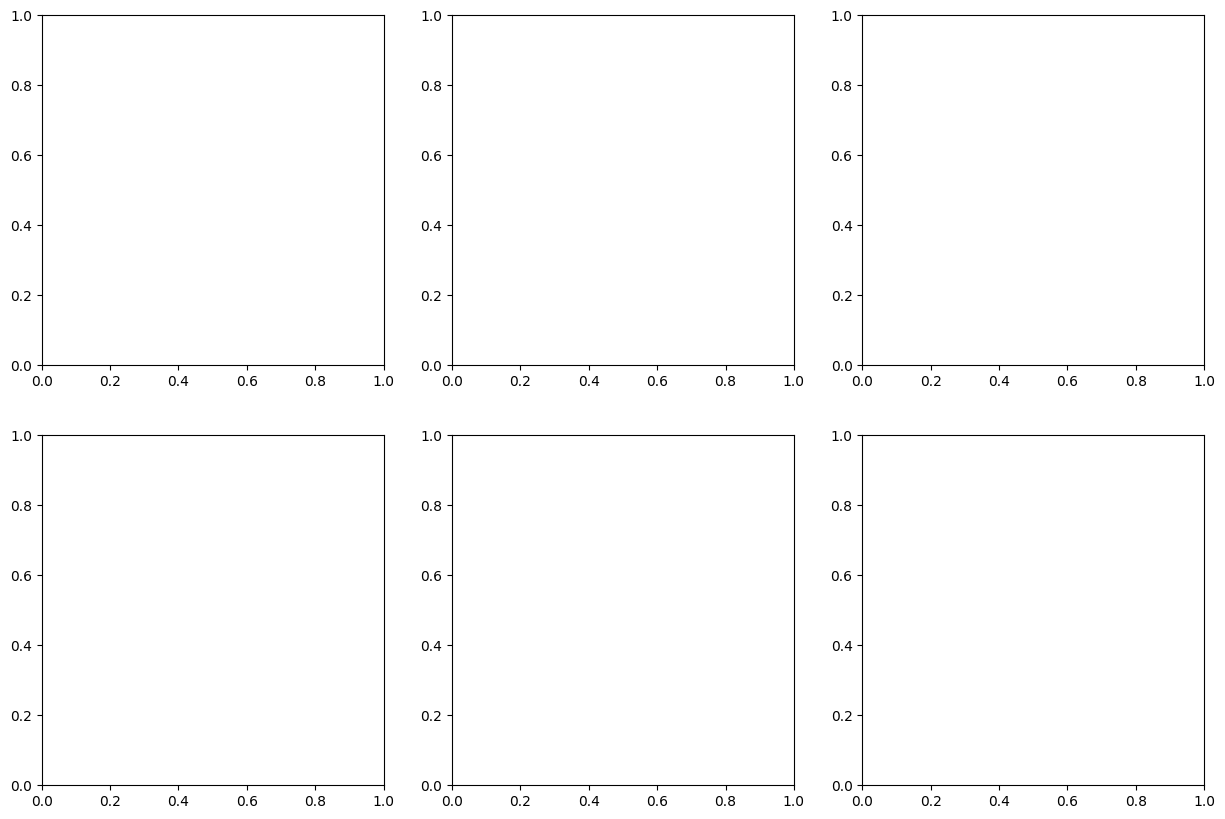

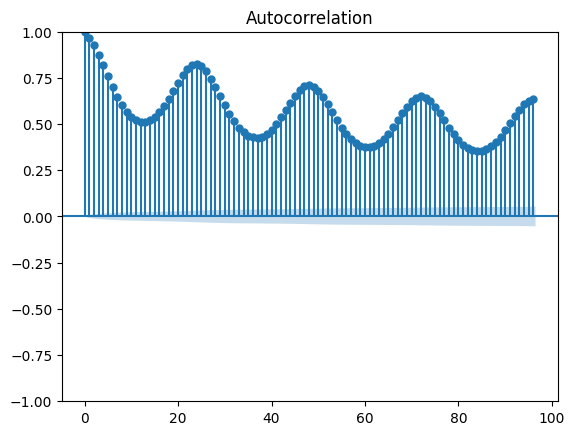

In [19]:
## Plot autocorrelation for a range of lags
series_list = [degree_data, speed_data, vis_data, n_cloud_data, cloud_1_height_data, 
               temperature_data, dew_data, air_pressure_data]
for series in series_list:
    plot_acf(series, lags=168) # A week
    plt.show()

In [ ]:
temperature_data = raw_METAR_data['temperature']

In [ ]:
### Everything is here in 1 Cell to avoid confusions. Later will automate this for batch processing.
raw_data =temperature_data 
Temperature_Results = {} # Container for finalized data
param_list_1 = [6]
param_list_2 = [16]
param_list_3 = [2]
param_list_4 = [0.2]
param_list_5 = [80]
data_id = 'set1'
datadir = f'../results/temperature/temperature_{data_id}'

### NO Changes down Here ###
for p1 in param_list_1:
    for p2 in param_list_2:
        for p3 in param_list_3:
            for p4 in param_list_4:
                for p5 in param_list_5:
                    print(f'>>> Starting Training for param :')
                    print(f'window: {p1}')
                    print(f'batch_size: {p2}')
                    print(f'LSTM_depth: {p3}')
                    print(f'Dropout_rate: {p4}')
                    print(f'N_unit: {p5}')
                    
                    # Specify Hyperparameters, and perform training/predictions
                    hyperparameters = {
                        'n_units' : p5,'dropout_rate' : p4, 'n_dense' : 1,
                        'n_epochs' : 100,'n_batch' : p2,'LSTM_depth' : p3,
                        'n_train' :1000,'n_test' : 200,
                        'window_size':p1, 'scaling':'MinMax'
                    }
                    r = ML.process_training_data_and_learn(raw_data, hyperparameters)
                    ##Save_result
                    file_path  = f'{datadir}_w{p1}_b{p2}_d{p3}_rate{p4}_unit{p5}.pkl' 
                    savedict(file_path, dict_name=r)
                    new_data = {f'{datadir}_w{p1}_b{p2}_d{p3}_rate{p4}_unit{p5}':r} 
                
                    ### Provide NEW Data Container
                    Temperature_Results.update(new_data)

# 4.Dew

In [6]:
dew_data = raw_METAR_data['dew']

In [ ]:
### Everything is here in 1 Cell to avoid confusions. Later will automate this for batch processing.
raw_data =dew_data 
Dew_Results = {} # Container for finalized data
param_list_1 = [6,12,24]
param_list_2 = [8,16,32]
param_list_3 = [2,3,4]
param_list_4 = [0.1,0.2,0.3]
param_list_5 = [50,80]
data_id = 'set1'
datadir = f'../results/dew/dew_{data_id}'

### NO Changes down Here ###
for p1 in param_list_1:
    for p2 in param_list_2:
        for p3 in param_list_3:
            for p4 in param_list_4:
                for p5 in param_list_5:
                    print(f'>>> Starting Training for param :')
                    print(f'window: {p1}')
                    print(f'batch_size: {p2}')
                    print(f'LSTM_depth: {p3}')
                    print(f'Dropout_rate: {p4}')
                    print(f'N_unit: {p5}')
                    
                    # Specify Hyperparameters, and perform training/predictions
                    hyperparameters = {
                        'n_units' : p5,'dropout_rate' : p4, 'n_dense' : 1,
                        'n_epochs' : 100,'n_batch' : p2,'LSTM_depth' : p3,
                        'n_train' :1000,'n_test' : 200,
                        'window_size':p1, 'scaling':'MinMax'
                    }
                    r = ML.process_training_data_and_learn(raw_data, hyperparameters)
                    ##Save_result
                    file_path  = f'{datadir}_w{p1}_b{p2}_d{p3}_rate{p4}_unit{p5}.pkl' 
                    savedict(file_path, dict_name=r)
                    new_data = {f'{datadir}_w{p1}_b{p2}_d{p3}_rate{p4}_unit{p5}':r} 
                
                    ### Provide NEW Data Container
                    Dew_Results.update(new_data)

>>> Starting Training for param :
window: 6
batch_size: 8
LSTM_depth: 2
Dropout_rate: 0.1
N_unit: 50
Epoch 1: loss = 0.05450265482068062, duration = 6.90 seconds
Epoch 11: loss = 0.007681295275688171, duration = 1.04 seconds
Epoch 21: loss = 0.00414268160238862, duration = 1.04 seconds
Epoch 31: loss = 0.003136988263577223, duration = 1.08 seconds
Epoch 41: loss = 0.002946313237771392, duration = 1.08 seconds
Epoch 51: loss = 0.00274845864623785, duration = 0.96 seconds
Epoch 61: loss = 0.002427485538646579, duration = 0.93 seconds
Epoch 71: loss = 0.0024616976734250784, duration = 0.84 seconds
Epoch 81: loss = 0.002497731475159526, duration = 0.95 seconds
Epoch 91: loss = 0.002388467313721776, duration = 0.88 seconds
7/7 [==============================] - 1s 3ms/step
The root mean squared error is 1.0043114457860005.
The data dictionary has been saved to ../results/dew/dew_set1_w6_b8_d2_rate0.1_unit50.pkl.
>>> Starting Training for param :
window: 6
batch_size: 8
LSTM_depth: 2
Dropout

# 5.Air Pressure